In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.boston_housing.load_data(
                                     path='boston_housing_npz',
                                     test_split=0.2,
                                     seed=42
                                   )

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 1s 15us/step


In [4]:
(X_train.shape,type(X_train)),(X_test.shape,type(X_test)),(y_train.shape,type(y_train)),(y_test.shape,type(y_test))

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [7]:
X_train_df=pd.DataFrame(X_train)
y_train_df=pd.DataFrame(y_train)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [10]:
X_train_df.info()
print('_'*40)
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [11]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
#Preprocessing
ct= make_column_transformer(
    (MinMaxScaler(),[0,1,2,4,5,6,7,8,9,10,11,12])
)
#Normalization and Datatype change
X_train=ct.fit_transform(X_train).astype('float32')
X_test=ct.transform(X_test).astype('float32')
y_train=y_train.astype('float32')
y_test.astype('float32')

pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,0.044668,0.119646,0.397749,0.350120,0.491227,0.687621,0.241930,0.376332,0.425962,0.626458,0.891484,0.307030
std,0.107264,0.246993,0.255098,0.239220,0.144443,0.287000,0.197944,0.379530,0.323504,0.231585,0.239079,0.204459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000853,0.000000,0.173387,0.139918,0.409904,0.444387,0.084381,0.130435,0.185115,0.510638,0.939167,0.146325
50%,0.002945,0.000000,0.338343,0.314815,0.477527,0.774459,0.178561,0.173913,0.280534,0.691489,0.985451,0.272399
75%,0.041547,0.131579,0.646628,0.491770,0.561115,0.943872,0.371796,1.000000,0.914122,0.808511,0.997125,0.425936
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((326, 12), (37, 12), (326,), (37,))

In [19]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu',input_shape=(X_train.shape[1],), name='Dense_1'),
    tf.keras.layers.Dense(units=100,activation='relu',name='Dense_2'),
    tf.keras.layers.Dense(units=1,name='Prediction')
])

model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['mse']
)

history=model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val,y_val)
)

C:\Users\Chinmayee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 441.4745 - mse: 441.4745 - val_loss: 106.2966 - val_mse: 106.2966
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.5019 - mse: 105.5019 - val_loss: 83.9406 - val_mse: 83.9406
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.4145 - mse: 79.4145 - val_loss: 73.1067 - val_mse: 73.1067
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.6817 - mse: 66.6817 - val_loss: 67.0329 - val_mse: 67.0329
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.5372 - mse: 59.5372 - val_loss: 62.2167 - val_mse: 62.2167
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.4112 - mse: 54.4112 - val_loss: 58.5262 - val_mse: 58.5262
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.1203 - mse: 50.1203 - val_loss: 54.3645 - val_mse: 54.3645
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.0715 - mse: 46.0715 - val_loss: 50.3476 - val_mse: 50.3476
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━

In [20]:
y_train.mean(), y_val.mean()

(22.346012, 21.262165)

In [21]:
print("Evaluation on the Test data\n")
loss,mse=model.evaluate(X_test,y_test,batch_size=32)
print(f"\nModel loss on test set:{loss}")
print(f"Model mean squared error on test set:{(mse):.2f}")

Evaluation on the Test data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1153 - mse: 13.1153

Model loss on test set:14.90585708618164
Model mean squared error on test set:14.91


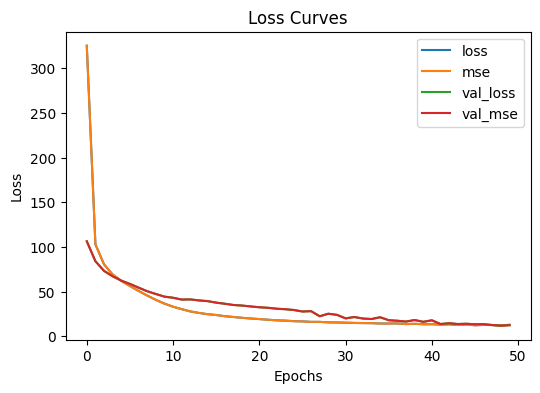

In [23]:
pd.DataFrame(history.history).plot(figsize=(6,4),xlabel="Epochs",ylabel="Loss",title='Loss Curves')
plt.show()

In [29]:
y_pred=model.predict(X_test)
y_pred[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([20.016342], dtype=float32)